## Import Data

Temperature (degC)
0    3.6
1    3.7
2    3.6
3    3.7
4    3.6
Name: Temperature (degC), dtype: float64
min: 3.5
max: 46.1


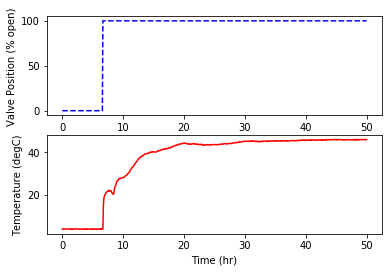

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pipeline data URL (don't need wget)
url = 'https://apmonitor.com/pdc/uploads/Main/pipeline_data.txt'

# import data with pandas
data = pd.read_csv(url)
time = 'Time (min)'
valve = 'Valve Position (% open)'
TC = 'Temperature (degC)'

# print temperature values
print(TC)
print(data[TC][0:5])
print('min: '+str(min(data[TC])))
print('max: '+str(max(data[TC])))

# plot data with pyplot
plt.figure()
plt.subplot(2,1,1)
plt.plot(data[time]/60.0,data[valve],'b--')
plt.ylabel(valve)

plt.subplot(2,1,2)
plt.plot(data[time]/60.0,data[TC],'r-')
plt.ylabel(TC)
plt.xlabel('Time (hr)')
plt.show()

## Create Model with Parameters from Graph

In [5]:
def graphical_method(t,u):
    θp = 0
    τp = 4 * 60 #(min)
    Kp = 0.43
    
    y = Kp*(1-np.exp(-t/τp))*u
    
    return y

graphical = graphical_method(data[time],data[valve])

## Create Model with Parameters from Scipy.optimize.minimize

In [6]:
from scipy.optimize import minimize

τp0 = 4 * 60 #(min)
Kp0 = 0.43

x0 = [τp0, Kp0]

def minimize_method(x,t,u):
    τp = x[0]
    Kp = x[1]
    
    y = Kp*(1-np.exp(-t/τp))*u
    return y

def objective(x):
    sumerror = 0
    
    for i in range(len(data)):
        sumerror = sumerror + np.absolute(minimize_method(x,data[time][i],data[valve][i]) - data[TC][i])
    
    return sumerror

solution = minimize(objective,x0)
τp = solution.x[0]
Kp = solution.x[1]

x = [τp, Kp]

minimize = minimize_method(x,data[time],data[valve])

## Plot Results

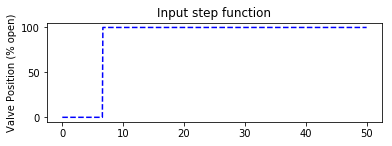

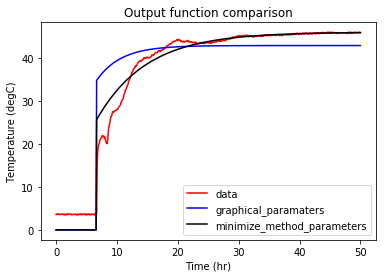

In [8]:
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(data[time]/60.0,data[valve],'b--')
plt.ylabel(valve)
plt.title("Input step function")

plt.figure(2)
plt.title("Output function comparison")
plt.plot(data[time]/60.0,data[TC],'r-', label='data')
plt.plot(data[time]/60.0,graphical,'b-', label='graphical_paramaters')
plt.plot(data[time]/60.0,minimize,'k-', label='minimize_method_parameters')
plt.ylabel(TC)
plt.xlabel('Time (hr)')
plt.legend()
plt.savefig('Step_Response.png')
plt.show()